In [11]:
import os
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
dht = ["pastry", "kademlia"]
terms = ["key", "time", "log"]
nodes = ["4", "8", "16", "32", "64", "128", "256"]

In [13]:
avg_arr = {}
std_arr = {}

for d in dht:
    for t in terms:
        for n in nodes:
            data = []
            count_of_lines = 0
            for i in range(5):
                with open(f"./data/{t}_{d}_{n}_{i}.txt") as f:
                    lines = f.readlines()
                count_of_lines += len(lines)
                for j in range(len(lines)):
                    lines[j] = lines[j].strip()
                    lines[j] = lines[j].split()
                    lines[j] = lines[j][0]
                lines = np.array(lines)
                lines = lines.astype(float)
                lines = lines.reshape(-1, 1)
                if t == "key":
                    lines = np.std(lines, axis=0)
                else:
                    lines = np.sum(lines, axis=0)
                print(lines)
                data.append(lines)
            data = np.array(data)
            # print(data)
            data = data.astype(float)
            # Average
            avg = np.mean(data, axis=0)
            # avg = np.mean(data, axis=0)
            # Standard deviation
            std = np.std(data, axis=0)
            # std = np.std(data, axis=0)
            
            avg_arr[f"{d}_{t}_{n}"] = avg
            std_arr[f"{d}_{t}_{n}"] = std
            
print(avg_arr)

[25.97113783]
[22.50555487]
[21.52905014]
[23.84323804]
[24.25901894]
[16.7182535]
[13.42572158]
[17.29161647]
[17.55704987]
[17.63519209]
[5.27967802]
[8.17006732]
[7.94512429]
[7.82623792]
[8.13172798]
[4.44409721]
[5.28559363]
[4.96865173]
[4.7565744]
[4.93077073]
[3.61204582]
[3.68908864]
[3.82630697]
[3.44374433]
[4.06778502]
[2.347705]
[2.40361057]
[2.3410401]
[2.72072486]
[2.40035805]
[1.37748355]
[1.44933983]
[1.54331978]
[1.37464484]
[1.25895232]
[79349.]
[70904.]
[68200.]
[68717.]
[72883.]
[106139.]
[110770.]
[106882.]
[119332.]
[111988.]
[119384.]
[127925.]
[129280.]
[115127.]
[121843.]
[113167.]
[125744.]
[116214.]
[128843.]
[136213.]
[121787.]
[115214.]
[116587.]
[128913.]
[150938.]
[108045.]
[79660.]
[83945.]
[86537.]
[102425.]
[80730.]
[81448.]
[78975.]
[89889.]
[54165.]
[155.]
[150.]
[144.]
[141.]
[136.]
[176.]
[200.]
[191.]
[173.]
[165.]
[253.]
[235.]
[245.]
[251.]
[254.]
[363.]
[286.]
[342.]
[352.]
[329.]
[399.]
[376.]
[349.]
[370.]
[365.]
[383.]
[391.]
[433.]
[351.]


In [14]:
# Data is of format term_dht_node_i.txt
# Compare term vs node

def plot_data(term):
    fig, ax = plt.subplots()
    for d in dht:
        data = []
        for n in nodes:
            data.append(avg_arr[f"{d}_{term}_{n}"])
        data = np.array(data)
        ax.plot(np.array(nodes).astype(int), data, label=d)
        ax.scatter(np.array(nodes).astype(int), data)
        # ax.errorbar(np.array(nodes).astype(np.int), data[:, 0], yerr=std_arr[f"{d}_{term}_4"], label=d)
    ax.set_xlabel("Number of nodes")
    ax.set_ylabel(term)
    ax.set_title(f"{term} vs Number of nodes")
    ax.legend()
    plt.show()

Text(0.5, 1.0, 'Total Time taken vs Number of nodes')

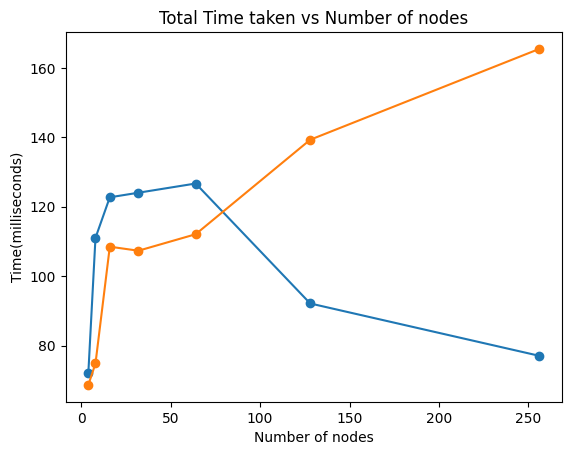

In [15]:
for d in dht:
    data = []
    for n in nodes:
        data.append(avg_arr[f"{d}_time_{n}"])
    data = np.array(data)
    plt.plot(np.array(nodes).astype(int), data/1000, label=d)
    plt.scatter(np.array(nodes).astype(int), data/1000)
plt.xlabel("Number of nodes")
plt.ylabel("Time(milliseconds)")
# plt.yscale("log")
plt.title("Total Time taken vs Number of nodes")


[[ 68650. ]
 [ 74834.4]
 [108482. ]
 [107321.6]
 [112072.6]
 [139298.4]
 [165471. ]]


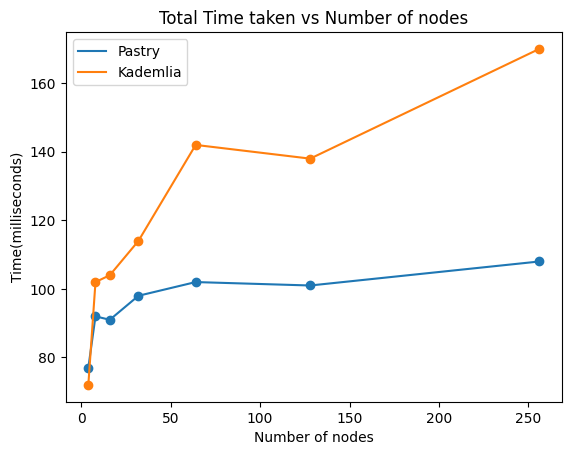

In [16]:
avg_kadem = [72, 102, 104, 114, 142, 138, 170]
avg_pastry = [77, 92, 91, 98, 102, 101, 108]

plt.plot(np.array(nodes).astype(int), avg_pastry, label="Pastry")
plt.scatter(np.array(nodes).astype(int), avg_pastry)
plt.plot(np.array(nodes).astype(int), avg_kadem, label="Kademlia")
plt.scatter(np.array(nodes).astype(int), avg_kadem)
plt.legend()
plt.xlabel("Number of nodes")
plt.ylabel("Time(milliseconds)")
plt.title("Total Time taken vs Number of nodes")
print(data)

plt.savefig("time.png")

[[23.62159996]
 [16.5255667 ]
 [ 7.47056711]
 [ 4.87713754]
 [ 3.72779416]
 [ 2.44268771]
 [ 1.40074806]]
[[30.86263681]
 [16.84415014]
 [ 7.0312281 ]
 [ 5.20959648]
 [ 3.05405072]
 [ 1.67858366]
 [ 1.01962526]]


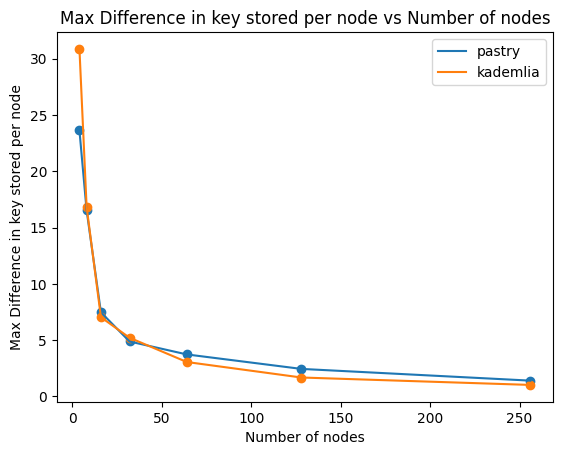

In [17]:
for d in dht:
    data = []
    for n in nodes:
        data.append(avg_arr[f"{d}_key_{n}"])
    data = np.array(data)
    plt.plot(np.array(nodes).astype(int), data, label=d)
    plt.scatter(np.array(nodes).astype(int), data)
    print(data)
    
plt.xlabel("Number of nodes")
plt.ylabel("Max Difference in key stored per node")
plt.title("Max Difference in key stored per node vs Number of nodes")
plt.legend()
plt.savefig("key_diff.png")

[[145.2]
 [181. ]
 [247.6]
 [334.4]
 [371.8]
 [393. ]
 [439.8]]
[[ 190.8]
 [ 371.8]
 [ 511. ]
 [ 651.6]
 [ 797.6]
 [ 944.8]
 [1089. ]]


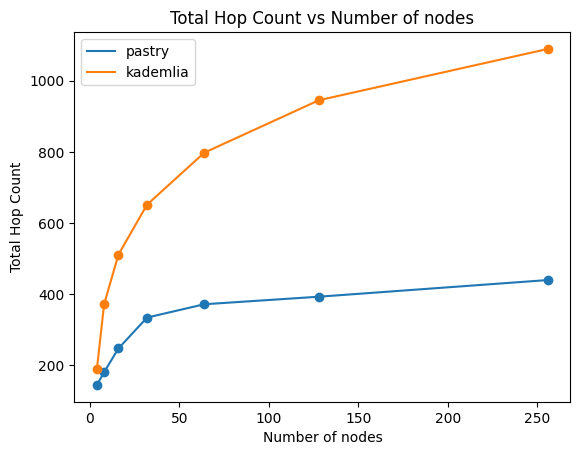

In [18]:
for d in dht:
    data = []
    for n in nodes:
        data.append(avg_arr[f"{d}_log_{n}"])
    data = np.array(data)
    plt.plot(np.array(nodes).astype(int), data, label=d)
    plt.scatter(np.array(nodes).astype(int), data)
    print(data)

plt.xlabel("Number of nodes")
plt.ylabel("Total Hop Count")
plt.title("Total Hop Count vs Number of nodes")
# plt.xscale("log")
plt.legend()
plt.savefig("hop_count.png")

[[495.94077135]
 [613.38232044]
 [495.60500808]
 [370.92165072]
 [340.74179666]
 [234.40814249]
 [175.17371533]]
[[359.80083857]
 [201.27595481]
 [212.29354207]
 [164.70472683]
 [140.51228686]
 [147.43691787]
 [151.9476584 ]]


Text(0.5, 1.0, 'Average Compute Time per hop vs Number of nodes')

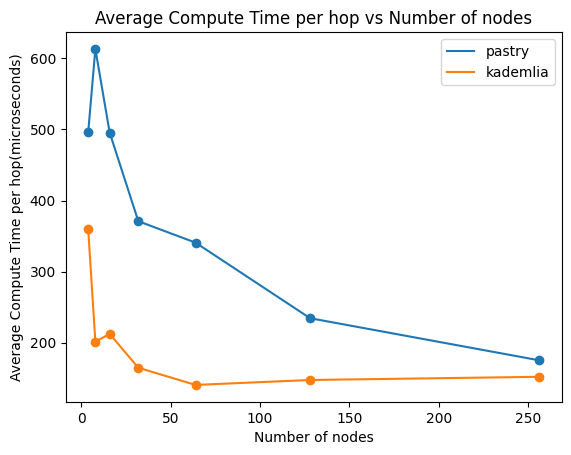

In [19]:
for d in dht:
    data = []
    for n in nodes:
        data.append(avg_arr[f"{d}_time_{n}"]/avg_arr[f"{d}_log_{n}"])
    data = np.array(data)
    plt.plot(np.array(nodes).astype(int), data, label=d)
    plt.scatter(np.array(nodes).astype(int), data)
    print(data)
    

plt.xlabel("Number of nodes")
plt.ylabel("Average Compute Time per hop(microseconds)")
plt.legend()
plt.title("Average Compute Time per hop vs Number of nodes")
    


```

```

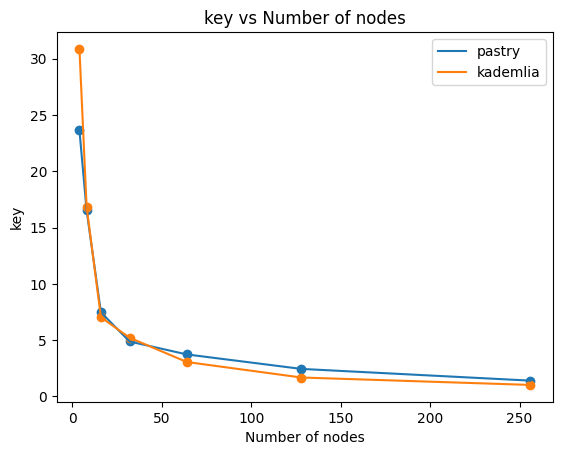

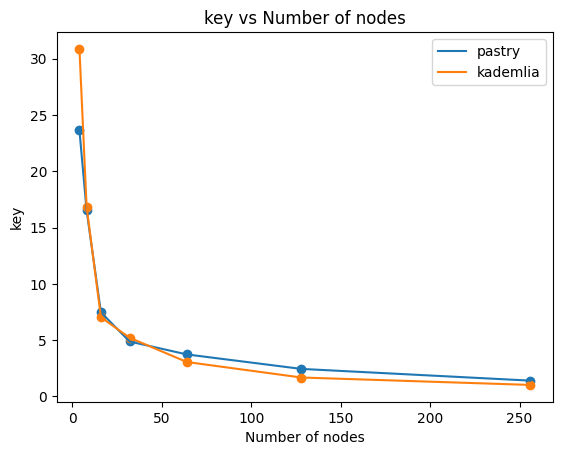

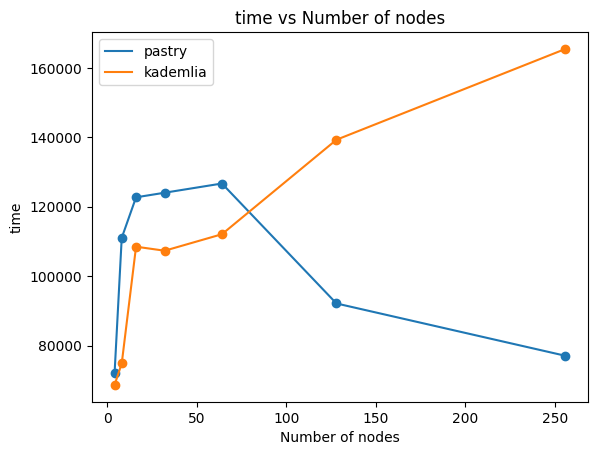

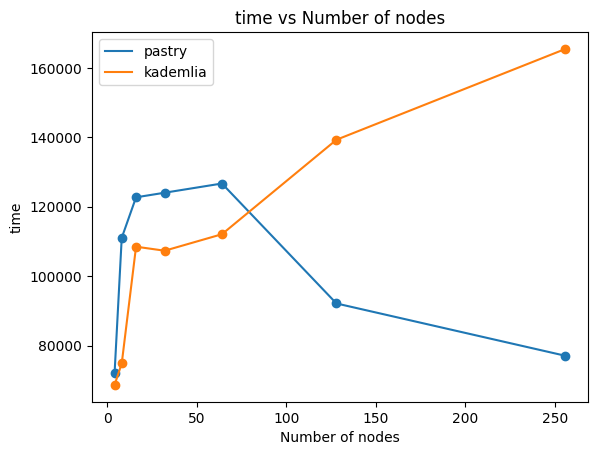

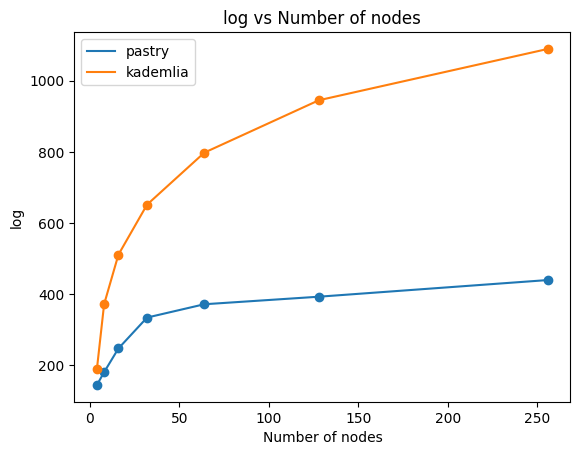

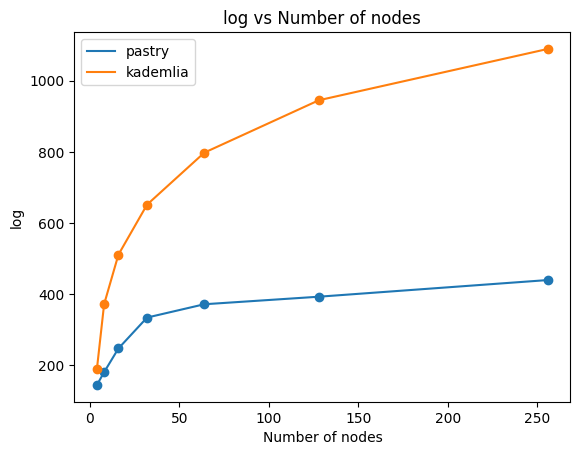

In [20]:
for term in terms:
    for d in dht:
        plot_data(term)